In [1]:
# import library
import keras as k

In [2]:
k.__version__

'2.14.0'

# Developing Deep Learning Models with Keras

In [3]:
# load data
# preprocessing
# define your model - add layers
# compile mode - specify loss functions (errors) and optimizers (reduce the loss and increse performance)
# fit your model 
# make predictions (generate prediction on new data)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
# numpy.random.seed(7)

In [5]:
# load pima Indians dataset
data = numpy.loadtxt('pima-indians-diabetes.csv',delimiter=',')

# split into input(x) and output(Y) variables
X = data[:,0:8]
Y = data[:,8]

In [7]:
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
# we have initiatized our random number generator to ensure our results are reproducible and loaded our data.
# we are ready to define our neural network model


## Define model

In [9]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# paramter_number = output_channel_number * (input_channel_number + 1)


## Compile the model

In [12]:
# 3 paramters to be provided: loss function, Optimizer

# loss functions:
# 1. Regression (numeric): Mean Squared Error or mean squared error
# 2. Binary Classification (2 class): logaithmic loss, also called cross entropy or binary crossentropy
# 3. Multiclass Classification (>2 class): Multiclass Logarithmic Loass or categorical crossentropy

# Optimizers:
# Stochastic Gradient Descent or sgd: requires tuning of a learning rate and momentum
# Adam or adam: mostly used. requires the tuning of learning rate
# RMSprop or rmsprop (numeric problem): requires tuning of learning rate- how much model should learn in each iterations

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit Model

In [13]:
# when you fit, the model will learn
# Set the Number of instances that are evaluated before a weight update in the network is performed, called the batch size.
history = model.fit(X, Y, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
77/77 [==============================] - 1s 3ms/step - loss: 6.0658 - accuracy: 0.5013
Epoch 2/150
77/77 [==============================] - 0s 4ms/step - loss: 1.6232 - accuracy: 0.6289
Epoch 3/150
77/77 [==============================] - 0s 4ms/step - loss: 0.9158 - accuracy: 0.6497
Epoch 4/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7707 - accuracy: 0.6589
Epoch 5/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.6510
Epoch 6/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.6549
Epoch 7/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.6706
Epoch 8/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6628
Epoch 9/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.6628
Epoch 10/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6680
Epoch 11/

77/77 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.6784
Epoch 84/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.6888
Epoch 85/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5880 - accuracy: 0.6836
Epoch 86/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.6797
Epoch 87/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.6823
Epoch 88/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.6849
Epoch 89/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.6758
Epoch 90/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.6875
Epoch 91/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.6875
Epoch 92/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.6849
Epoch 93/150


## Evaluate Model

In [14]:
scores = model.evaluate(X,Y)
print('%s: %.2f%%' % (model.metrics_names[1],scores[1]*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.6940
accuracy: 69.40%


Text(0, 0.5, 'Cross Entropy Loss')

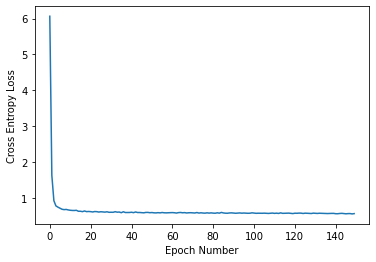

In [15]:
# plot history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='binary cross entropy loss')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy Loss')


Text(0, 0.5, 'Accuracy')

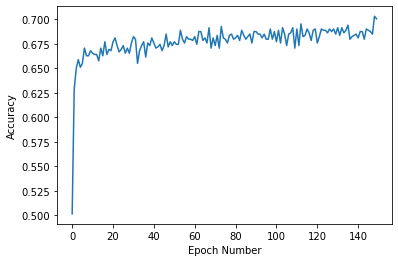

In [16]:
# plot history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

## Make predictions


In [17]:
# calculate predictions
predictions = model.predict(X)

# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

24/24 [==============================] - 0s 2ms/step
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0